# Video Game Sales Data Analysis

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

## Exploratory Data Analysis

### Preprocessing

In [ ]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.shape

(16598, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.isna().sum()/df.shape[0]*100 # Percent of missing values for each column

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

I decided to drop all of the rows that have any missing values for year and publisher since I want to produce some visualizations with both of those variables

In [ ]:
df[df['Year'] > 2016].value_counts()

Rank   Name                                              Platform  Year    Genre         Publisher     NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
16441  Brothers Conflict: Precious Baby                  PSV       2017.0  Action        Idea Factory  0.00      0.0       0.01      0.00         0.01            1
16244  Phantasy Star Online 2 Episode 4: Deluxe Package  PSV       2017.0  Role-Playing  Sega          0.00      0.0       0.01      0.00         0.01            1
14393  Phantasy Star Online 2 Episode 4: Deluxe Package  PS4       2017.0  Role-Playing  Sega          0.00      0.0       0.03      0.00         0.03            1
5959   Imagine: Makeup Artist                            DS        2020.0  Simulation    Ubisoft       0.27      0.0       0.00      0.02         0.29            1
dtype: int64

In [ ]:
df = df[df['Year'] < 2017] 
df['Year'].max()

2016.0

I subsetted the data to only include video game titles sold before 2017 since there seem to be a very small number of video game titles sold after 2016 in this dataset

### Visualizations

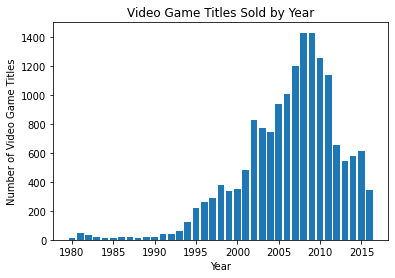

In [ ]:
years = df.groupby('Year')['Name'].count().reset_index()

plt.bar(years['Year'], years['Name'])
plt.title('Video Game Titles Sold by Year')
plt.xlabel('Year')
plt.ylabel('Number of Video Game Titles')
plt.show()

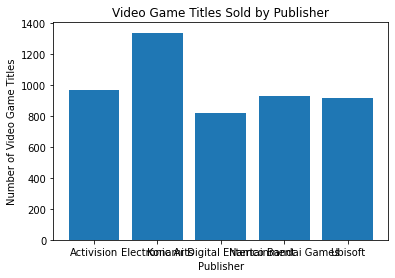

In [ ]:
publishers = df.groupby('Publisher')['Name'].count().reset_index()
publishers = publishers[publishers['Name'] > 800]

plt.bar(publishers['Publisher'], publishers['Name'])
plt.title('Video Game Titles Sold by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Video Game Titles')
plt.show()